# 7.2.1 Representation of quantum information -  Square wells and qubits




Reference: Nielsen and Chuang, Page 280, Box 7.1: Square wells and qubits

## Setup

In [1]:
!pip install -q qutip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.6/31.6 MB 30.6 MB/s eta 0:00:00


In [2]:
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt

We create a numerical model of the unperturbed particle-in-a-box Hamiltonian, $H_0​=p^2/2m$

In [3]:
# System parameters
N = 200      # Number of grid points
L = 1.0      # Box length
m = 1.0      # Mass
hbar = 1.0
dx = L / (N + 1) # Grid spacing
x_vec = np.linspace(dx, L - dx, N) # Internal grid points

In [4]:
# Create the Kinetic Hamiltonian

D2 = (np.diag(np.ones(N - 1), -1) - 2 * np.diag(np.ones(N)) +
      np.diag(np.ones(N - 1), 1)) / dx**2
H0 = - (hbar**2 / (2 * m)) * D2
H0 = qt.Qobj(H0)

In [7]:
D2

array([[-80802.,  40401.,      0., ...,      0.,      0.,      0.],
       [ 40401., -80802.,  40401., ...,      0.,      0.,      0.],
       [     0.,  40401., -80802., ...,      0.,      0.,      0.],
       ...,
       [     0.,      0.,      0., ..., -80802.,  40401.,      0.],
       [     0.,      0.,      0., ...,  40401., -80802.,  40401.],
       [     0.,      0.,      0., ...,      0.,  40401., -80802.]])

In [9]:
# Find the first 5 eigenstates and eigenvalues
k = 5
evals, estates = H0.eigenstates(sparse=True, eigvals=k)

In [10]:
# Define the qubit states and projectors
psi1 = estates[0] # Qubit |0>
psi2 = estates[1] # Qubit |1>
psi3 = estates[2] # First "leakage" state
psi4 = estates[3]
psi5 = estates[4]

In [16]:
psi1

Quantum object: dims=[[200], [1]], shape=(200, 1), type='ket', dtype=Dense
Qobj data =
[[0.00155903]
 [0.00311767]
 [0.00467555]
 [0.00623229]
 [0.00778751]
 [0.00934083]
 [0.01089186]
 [0.01244023]
 [0.01398557]
 [0.01552748]
 [0.01706561]
 [0.01859956]
 [0.02012898]
 [0.02165347]
 [0.02317268]
 [0.02468622]
 [0.02619373]
 [0.02769485]
 [0.0291892 ]
 [0.03067642]
 [0.03215614]
 [0.03362801]
 [0.03509167]
 [0.03654675]
 [0.03799291]
 [0.03942978]
 [0.04085702]
 [0.04227428]
 [0.04368122]
 [0.04507748]
 [0.04646273]
 [0.04783663]
 [0.04919885]
 [0.05054904]
 [0.05188689]
 [0.05321206]
 [0.05452424]
 [0.05582309]
 [0.05710831]
 [0.05837958]
 [0.05963658]
 [0.06087902]
 [0.06210658]
 [0.06331898]
 [0.0645159 ]
 [0.06569707]
 [0.06686218]
 [0.06801097]
 [0.06914314]
 [0.07025841]
 [0.07135653]
 [0.07243721]
 [0.0735002 ]
 [0.07454523]
 [0.07557205]
 [0.07658042]
 [0.07757007]
 [0.07854077]
 [0.07949229]
 [0.08042439]
 [0.08133684]
 [0.08222943]
 [0.08310192]
 [0.08395412]
 [0.0847858 ]
 [0

In [11]:
# Print energy levels to confirm
print("First 5 Energy Levels:")
analytic_evals = [(n**2 * np.pi**2 * hbar**2) / (2 * m * L**2) for n in range(1, k + 1)]
for i in range(k):
    print(f"  E_{i+1}: Found={evals[i]:.4f}, Analytic={analytic_evals[i]:.4f}")

First 5 Energy Levels:
  E_1: Found=4.9347, Analytic=4.9348
  E_2: Found=19.7376, Analytic=19.7392
  E_3: Found=44.4051, Analytic=44.4132
  E_4: Found=78.9311, Analytic=78.9568
  E_5: Found=123.3073, Analytic=123.3701


In [12]:
# Define projectors to measure population in each state
P1_proj = qt.ket2dm(psi1)
P2_proj = qt.ket2dm(psi2)
P3_proj = qt.ket2dm(psi3)
P4_proj = qt.ket2dm(psi4)
P5_proj = qt.ket2dm(psi5)

In [13]:
P1_proj

Quantum object: dims=[[200], [200]], shape=(200, 200), type='oper', dtype=Dense, isherm=True
Qobj data =
[[2.43055920e-06 4.86052465e-06 7.28930274e-06 ... 7.28930274e-06
  4.86052465e-06 2.43055920e-06]
 [4.86052465e-06 9.71986194e-06 1.45768248e-05 ... 1.45768248e-05
  9.71986194e-06 4.86052465e-06]
 [7.28930274e-06 1.45768248e-05 2.18607860e-05 ... 2.18607860e-05
  1.45768248e-05 7.28930274e-06]
 ...
 [7.28930274e-06 1.45768248e-05 2.18607860e-05 ... 2.18607860e-05
  1.45768248e-05 7.28930274e-06]
 [4.86052465e-06 9.71986194e-06 1.45768248e-05 ... 1.45768248e-05
  9.71986194e-06 4.86052465e-06]
 [2.43055920e-06 4.86052465e-06 7.28930274e-06 ... 7.28930274e-06
  4.86052465e-06 2.43055920e-06]]

In [25]:
# List of expectation-value operators
e_ops_leakage = [P1_proj, P2_proj, P3_proj, P4_proj, P5_proj]

## Simulation 1: Control Operation and State Leakage

This simulates the particle in a box in a larger Hilbert space (using its first 5 energy levels) and apply the perturbation $\delta V(x)$. This will show how a control pulse attempts to perform an operation but also causes leakage to non-qubit states (the interference of other energy states).

We perform operations by adding a time-dependent perturbation, $\delta V(x,t)=V_0​(t)⋅\delta V(x)$. The Spatial part is given by:

$$
\delta V(x) = −\frac{9\pi^2}{16L^2}\left(x-\frac{L}{2}\right)
$$

To perform a qubit operation (a rotation from $∣\psi_1​\rangle$ to $∣\psi_2​\rangle$), we must drive the system at a frequency $\omega_d$​ equal to the qubit energy splitting: $\omega_d​=E_2​ − E_1$​.

In [20]:
# Define the perturbation operator (spatial part)
C = (9 * np.pi**2) / (16 * L**2) # The constant C
x_op = qt.qdiags(x_vec, 0)      # Position operator on the grid
I_op = qt.qeye(N)              # Identity operator
V_pert_op = -C * (x_op - (L/2) * I_op)

In [19]:
print(I_op)

Quantum object: dims=[[200], [200]], shape=(200, 200), type='oper', dtype=Dia, isherm=True
Qobj data =
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [21]:
# Define the drive Hamiltonian
H0_full = H0

omega_drive = evals[1] - evals[0]
print(f"Qubit Freq (E2-E1)/hbar: {omega_drive:.4f}")

drive_amplitude = 1.5

Qubit Freq (E2-E1)/hbar: 14.8029


In [22]:
def H1_coeff(t, args):
    return drive_amplitude * np.cos(omega_drive * t)

In [23]:
# Full time-dependent Hamiltonian
H_drive = [H0_full, [V_pert_op, H1_coeff]]

# Initial state: Qubit |0> (i.e., psi_1)
psi_initial = psi1

# Simulation time
t_list = np.linspace(0, 5.0, 400)

In [26]:
result_leakage = qt.sesolve(H_drive, psi_initial, t_list, e_ops=e_ops_leakage)

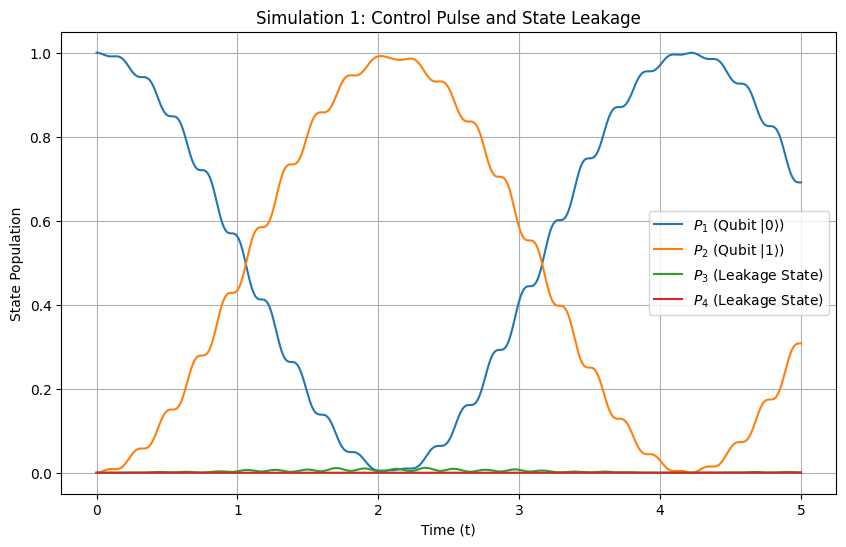

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(result_leakage.times, result_leakage.expect[0], label=r'$P_1$ (Qubit $|0\rangle$)')
plt.plot(result_leakage.times, result_leakage.expect[1], label=r'$P_2$ (Qubit $|1\rangle$)')
plt.plot(result_leakage.times, result_leakage.expect[2], label=r'$P_3$ (Leakage State)')
plt.plot(result_leakage.times, result_leakage.expect[3], label=r'$P_4$ (Leakage State)')
plt.title("Simulation 1: Control Pulse and State Leakage")
plt.xlabel("Time (t)")
plt.ylabel("State Population")
plt.legend()
plt.grid(True)
plt.show()

Web observe perfect Rabi oscillations. The population flows entirely from state 1 to state 2 and back again. The green line remains flat at zero, because that transition is now 0 due to the integrand being anti-symmetric. By choosing our control pulse to be anti-symmetric, we have successfully driven the $P_1$ to $P_2$​ transition and, at the same time, prevented leakage to the $P_3$​ state.

## Simulation 2: Control Operation and State Leakage with symmetric pertubation

In [28]:
# Define the symmetric perturbation operator (spatial part)
C = (9 * np.pi**2) / (16 * L**2) # The constant C
x_op = qt.qdiags(x_vec, 0)      # Position operator on the grid
I_op = qt.qeye(N)              # Identity operator
V_pert_op = -C * (x_op - (L/2) * I_op)**2

In [29]:
# Drive frequency: resonant with the qubit transition
omega_drive = evals[1] - evals[0]
print(f"Driving at Qubit Freq (E2-E1)/hbar: {omega_drive:.4f}")

Driving at Qubit Freq (E2-E1)/hbar: 14.8029


In [30]:
drive_amplitude = 1.5

In [31]:
# Time-dependent coefficient for H1
def H1_coeff(t, args):
    return drive_amplitude * np.cos(omega_drive * t)

In [32]:
# Full time-dependent Hamiltonian
H_drive = [H0, [V_pert_op, H1_coeff]]

# Initial state: Qubit |0> (i.e., psi_1)
psi_initial = psi1

# Simulation time
t_list = np.linspace(0, 5.0, 400)

In [33]:
result_good = qt.sesolve(H_drive, psi_initial, t_list, e_ops=e_ops_leakage)

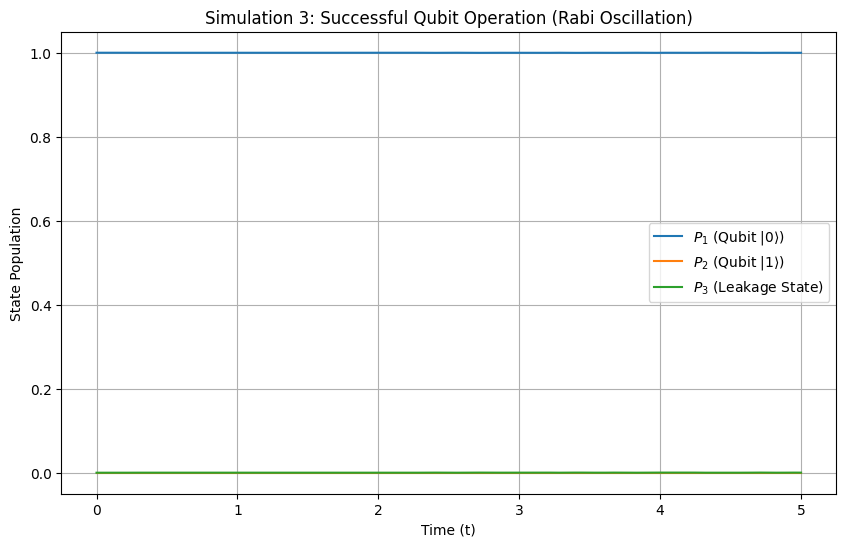

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(result_good.times, result_good.expect[0], label=r'$P_1$ (Qubit $|0\rangle$)')
plt.plot(result_good.times, result_good.expect[1], label=r'$P_2$ (Qubit $|1\rangle$)')
plt.plot(result_good.times, result_good.expect[2], label=r'$P_3$ (Leakage State)')
plt.title("Simulation 3: Successful Qubit Operation (Rabi Oscillation)")
plt.xlabel("Time (t)")
plt.ylabel("State Population")
plt.legend()
plt.grid(True)
plt.show()

Interpretation:
1. The Perturbation $\delta V(x)∝(x−L/2)^2$. This is a symmetric function.
2. The Qubit States:

    $∣\psi_1\rangle$ (ground state) is symmetric.

    $∣\psi_2​\rangle$ (first excited state) is anti-symmetric.
3. To drive a transition from $∣\psi_1​\rangle -> ∣\psi_2​\rangle$, the matrix element $\langle\psi_1​∣\delta V(x)∣\psi_2​\rangle$ must be non-zero. However, the integral of a (Symmetric × Symmetric × Anti-symmetric) function is exactly zero.

Therefore, the perturbation $\delta V(x)$ cannot drive the $∣\psi_1​\rangle <-> ∣\psi_2​\rangle$ transition. We were driving at that frequency, but the "antenna" (the perturbation) has zero-coupling. This is why the plot correctly shows no change.

## Simulation 3: Environmental Decoherence (T2​ Dephasing)

Here, we use an idealized two-level qubit system and show how coupling it to an external control system (that is, an environment) causes a different kind of decoherence: dephasing ($T_2$​ decay) which destroys superposition states.

For this, we will use an ideal 2-level qubit. We ignore the leakage problem from Simulation 1. We want to see what happens to a superposition state, as the text says decoherence destroy(s) qubit superposition states. The minimum lifetime for this is $T_2$​.

We will model this using the master equation. We will add a collapse operator ($c_{op}$​) that models the environment "measuring" the qubit's state, which causes dephasing. A $\sigma_z$​ collapse operator is a standard model for pure $T_2$​ dephasing.

- **Hamiltonian:** $H = \frac{\omega_q​}{2}​\sigma_z$​ (a qubit with energy splitting $\omega_q$​)
- **Initial State:** $∣\psi(0)\rangle = \frac{1}{\sqrt{2}}​(∣0\rangle+∣1\rangle)$ (a pure superposition state)
- **Dephasing Rate:** $\gamma$ = $0.2 \omega_q$
- **Collapse Operator:** $c_{op} ​= \sqrt{\gamma}⋅\sigma_z$​ (where $\gamma$ is the dephasing rate)

In [35]:
# Qubit energy splitting
omega_qubit = evals[1] - evals[0]

# Ideal 2-level Hamiltonian
H_ideal = 0.5 * omega_qubit * qt.sigmaz()

# Initial state: a superposition |+> = (|0> + |1>)/sqrt(2)
psi0_ideal = (qt.basis(2, 0) + qt.basis(2, 1)).unit()

# Define the dephasing rate (gamma)
dephasing_rate = omega_qubit * 0.2

# Define the collapse operator for T2 dephasing
c_op_dephasing = np.sqrt(dephasing_rate) * qt.sigmaz()

# Simulation time
t_list_decay = np.linspace(0, 5.0 / dephasing_rate, 200)

In [36]:
# simulation with decoherence
result_decay = qt.mesolve(H_ideal, psi0_ideal, t_list_decay,
                          c_ops=[c_op_dephasing],
                          e_ops=[qt.sigmax(), qt.sigmay(), qt.sigmaz()])

In [38]:
# simulation without decoherence
result_ideal = qt.mesolve(H_ideal, psi0_ideal, t_list_decay,
                          c_ops=[],
                          e_ops=[qt.sigmax(), qt.sigmay(), qt.sigmaz()])

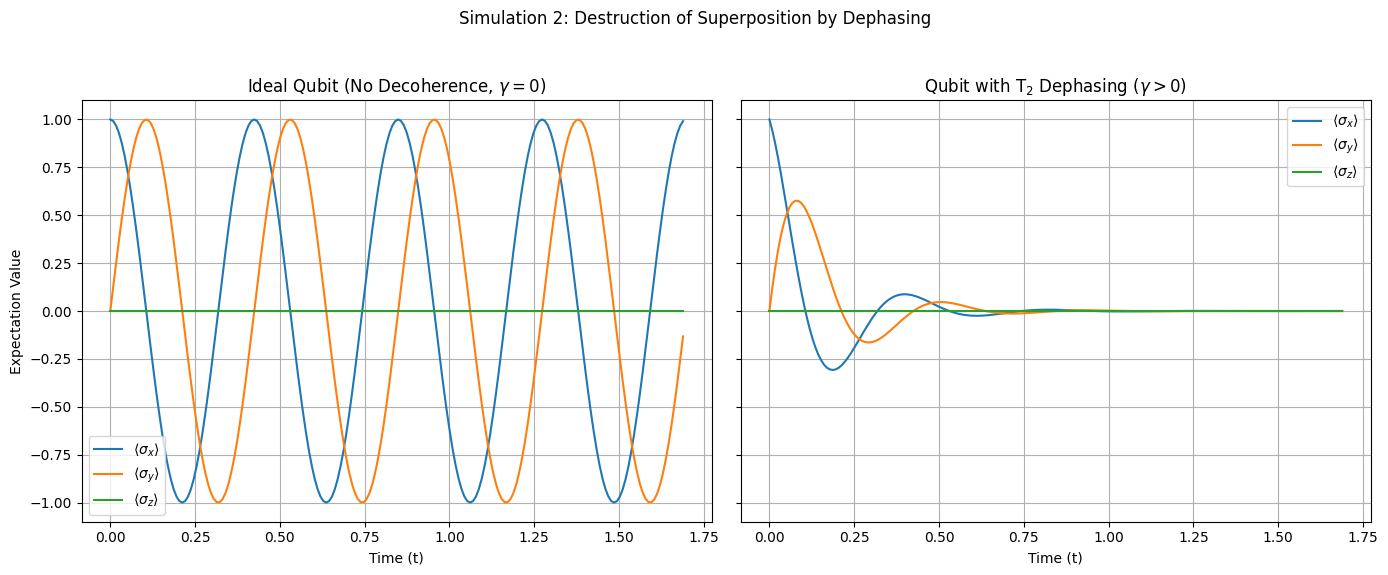

In [39]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot 1: Ideal, No Decoherence
ax1.plot(result_ideal.times, result_ideal.expect[0], label=r'$\langle \sigma_x \rangle$')
ax1.plot(result_ideal.times, result_ideal.expect[1], label=r'$\langle \sigma_y \rangle$')
ax1.plot(result_ideal.times, result_ideal.expect[2], label=r'$\langle \sigma_z \rangle$')
ax1.set_title(r"Ideal Qubit (No Decoherence, $\gamma=0$)")
ax1.set_xlabel("Time (t)")
ax1.set_ylabel("Expectation Value")
ax1.legend()
ax1.grid(True)

# Plot 2: With Decoherence
ax2.plot(result_decay.times, result_decay.expect[0], label=r'$\langle \sigma_x \rangle$')
ax2.plot(result_decay.times, result_decay.expect[1], label=r'$\langle \sigma_y \rangle$')
ax2.plot(result_decay.times, result_decay.expect[2], label=r'$\langle \sigma_z \rangle$')
ax2.set_title(rf"Qubit with T$_2$ Dephasing ($\gamma > 0$)")
ax2.set_xlabel("Time (t)")
ax2.legend()
ax2.grid(True)

plt.suptitle("Simulation 2: Destruction of Superposition by Dephasing")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

We tracked the expectation values of $\langle \sigma_x \rangle$, $\langle \sigma_y \rangle$, and $\langle \sigma_z \rangle$. For our initial state, $\langle \sigma_x \rangle$=1 and $\langle \sigma_y \rangle$=$\langle \sigma_z \rangle = 0$ . Decoherence caused $\langle \sigma_x \rangle$ and $\langle \sigma_y \rangle$ to decay to 0, as predicted.

1. **Ideal Qubit:** Without decoherence ($\gamma=0$), the qubit precesses. The $\langle \sigma_x \rangle$ and $\langle \sigma_y \rangle$ components oscillate, meaning the qubit stays in a pure superposition state, just rotating around the z-axis.
2. **Qubit with Dephasing:** With decoherence $(\gamma>0)$, the $\langle \sigma_x \rangle$ and $\langle \sigma_y \rangle$ components exponentially decay to zero. The final state is no longer a pure superposition. It has become a mixed state, represented by the Bloch vector pointing to $(0, 0, 0)$